In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/customer churn prediction.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Finding the datatypes of the features

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

#Deleting the rows with Null values at total charges

In [ ]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 21)

Converting The feature Totalcharges from Object to float

In [ ]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)
df1.dtypes

<ipython-input-11-ae9000f582fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64


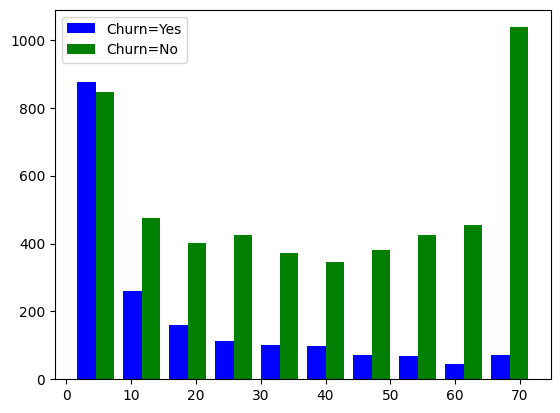

In [ ]:
churn_no=df1[df1.Churn=='No'].tenure
churn_yes=df1[df1.Churn=='Yes'].tenure
print(churn_no)
plt.hist([churn_yes,churn_no],color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

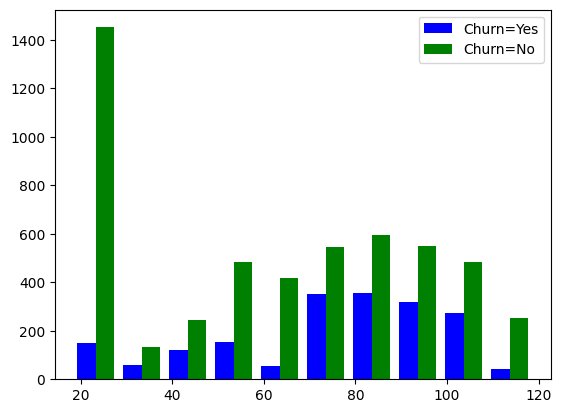

In [ ]:
churn_no=df1[df1.Churn=='No'].MonthlyCharges
churn_yes=df1[df1.Churn=='Yes'].MonthlyCharges
plt.hist([churn_yes,churn_no],color=['blue','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Function to find Unique values of the colums

In [ ]:
def print1_unique(df):
  for column in df:
    if(df[column].dtypes=='object'):
     print(f'{column} : {df[column].unique()}')

Converting No internet Services to No

In [ ]:
print1_unique(df1)
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


<ipython-input-15-5ae428e2add3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
<ipython-input-15-5ae428e2add3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [ ]:
print1_unique(df1)

customerID : ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


Convert Yes  =1 and No = 0

In [ ]:
encode_col = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in encode_col:
  df1[i].replace({'Yes':1, 'No':0},inplace=True)

<ipython-input-17-bad817e84ceb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i].replace({'Yes':1, 'No':0},inplace=True)


In [ ]:
df1

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,0,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,2234-XADUH,Female,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,4801-JZAZL,Female,0,1,1,11,0,0,DSL,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,Male,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [ ]:
df1['gender'].replace({'Male':1, 'Female':0},inplace=True)

<ipython-input-19-6371a444d1d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Male':1, 'Female':0},inplace=True)


Use hot encoding to convert features with more than 2 unique values.

In [ ]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.dtypes

customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic    

Scaling for better Accuracy

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale_column = ['tenure','TotalCharges','MonthlyCharges']

scale = MinMaxScaler()

df2[scale_column] = scale.fit_transform(df2[scale_column])
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,0,1,0,0.000000,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,1,0,0,0,0.464789,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,1,0,0,0,0.014085,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,1,0,0,0,0.619718,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,0,0.014085,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


Dropping Customer ID

In [ ]:
X1=df2.drop(['customerID','Churn'],axis=1)
y1=df2['Churn']

In [ ]:
X=X1.to_numpy()
y=y1.to_numpy()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99)
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

(7032, 20)

KNN

In [ ]:
from sklearn.model_selection import train_test_split
train_x , test_x, train_y, test_y = train_test_split(X,y, test_size = 0.2,random_state = 30)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model1 = KNeighborsClassifier(2)
model1.fit(train_x,train_y)


KNeighborsClassifier(n_neighbors=2)

In [ ]:
model1.score(test_x,test_y)

0.7448471926083866

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = model1.predict(test_x)
c = confusion_matrix(test_y, y_pred)
c

array([[936,  95],
       [264, 112]])

In [ ]:
from sklearn.metrics import classification_report
w = classification_report(test_y,y_pred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.78      0.91      0.84      1031
           1       0.54      0.30      0.38       376

    accuracy                           0.74      1407
   macro avg       0.66      0.60      0.61      1407
weighted avg       0.72      0.74      0.72      1407



Text(8.222222222222223, 0.5, 'Truth')

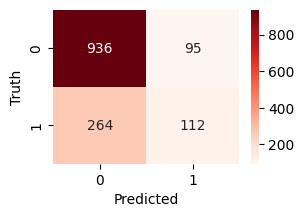

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(3,2))
sn.heatmap(c, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


Logistic

In [ ]:
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(train_x,train_y)

LogisticRegression()

In [ ]:
model2.score(test_x,test_y)

0.7945984363894811

In [ ]:
y_pred1 = model2.predict(test_x)
w = classification_report(test_y,y_pred1,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1031
           1       0.65      0.51      0.57       376

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.79      1407



Text(8.222222222222223, 0.5, 'Truth')

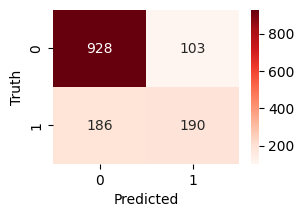

In [ ]:
y_pred = model2.predict(test_x)
c1 = confusion_matrix(test_y, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(c1, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 123)
classifier.fit(train_x, train_y)
classifier.score(test_x,test_y)

0.7882018479033405

In [ ]:
y_pred2 = classifier.predict(test_x)
w = classification_report(test_y,y_pred2,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1031
           1       0.64      0.48      0.55       376

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Text(8.222222222222223, 0.5, 'Truth')

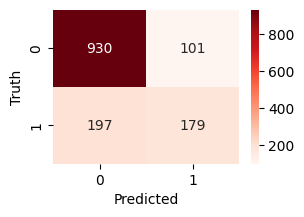

In [ ]:
y_pred2 = classifier.predict(test_x)
c11 = confusion_matrix(test_y, y_pred2)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM

In [ ]:
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(train_x, train_y)
svm1.score(test_x,test_y)

0.7874911158493249

In [ ]:
ypred = svm1.predict(test_x)
w = classification_report(test_y,ypred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1031
           1       0.64      0.48      0.55       376

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



Text(8.222222222222223, 0.5, 'Truth')

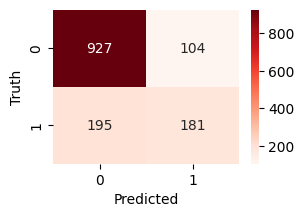

In [ ]:
y_pred2 = svm1.predict(test_x)
c11 = confusion_matrix(test_y, y_pred2)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Smote ENN for sampling

In [ ]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42, sampling_strategy = 'not majority')
X_sm, y_sm = smote_enn.fit_resample(X, y)

In [ ]:
train_xr , test_xr, train_yr, test_yr = train_test_split(X_sm,y_sm, test_size = 0.2,random_state = 30, stratify=y_sm)

In [ ]:
np.unique(train_yr, return_counts=True)


(array([0, 1]), array([2233, 2756]))

KNN after SMOTE ENN

In [ ]:
model3 = KNeighborsClassifier(2)
model3.fit(train_xr,train_yr)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
model3.score(test_xr,test_yr)

0.9855769230769231

In [ ]:
y_pred = model3.predict(test_xr)

c8 = confusion_matrix(test_yr, y_pred)
print(c)

[[936  95]
 [264 112]]


Text(8.222222222222223, 0.5, 'Truth')

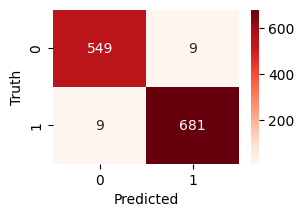

In [ ]:
y_pred2 = model3.predict(test_xr)
c8 = confusion_matrix(test_yr, y_pred2)
plt.figure(figsize=(3,2))
sn.heatmap(c8, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model3.predict(test_xr)
w = classification_report(test_yr,y_pred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       558
           1       0.99      0.99      0.99       690

    accuracy                           0.99      1248
   macro avg       0.99      0.99      0.99      1248
weighted avg       0.99      0.99      0.99      1248



LOGISTIC REGRESSION

In [ ]:
model4 = LogisticRegression()
model4.fit(train_xr,train_yr)

LogisticRegression()

In [ ]:
model4.score(test_xr,test_yr)

0.9014423076923077

In [ ]:
y_pred = model4.predict(test_xr)

c = confusion_matrix(test_yr, y_pred)
print(c)

[[484  74]
 [ 49 641]]


Text(8.222222222222223, 0.5, 'Truth')

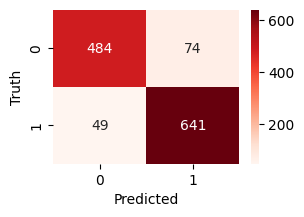

In [ ]:
y_pred = model4.predict(test_xr)
c11 = confusion_matrix(test_yr, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
y_pred = model4.predict(test_xr)
w = classification_report(test_yr,y_pred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       558
           1       0.90      0.93      0.91       690

    accuracy                           0.90      1248
   macro avg       0.90      0.90      0.90      1248
weighted avg       0.90      0.90      0.90      1248



Text(8.222222222222223, 0.5, 'Truth')

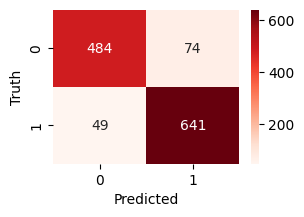

In [ ]:
y_pred = model4.predict(test_xr)
c11 = confusion_matrix(test_yr, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

RANDOM FOREST

In [ ]:
classifier1 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 30)
classifier1.fit(train_xr,train_yr)
classifier1.score(test_xr,test_yr)

0.96875

In [ ]:
y_pred = classifier1.predict(test_xr)

c = confusion_matrix(test_yr, y_pred)
print(c)

[[536  22]
 [ 17 673]]


In [ ]:
y_pred = classifier1.predict(test_xr)
w = classification_report(test_yr,y_pred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       558
           1       0.97      0.98      0.97       690

    accuracy                           0.97      1248
   macro avg       0.97      0.97      0.97      1248
weighted avg       0.97      0.97      0.97      1248



Text(8.222222222222223, 0.5, 'Truth')

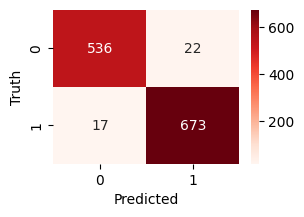

In [ ]:
y_pred = classifier1.predict(test_xr)
c11 = confusion_matrix(test_yr, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

SVM

In [ ]:
from sklearn import svm
svm1 = svm.SVC()
svm1.fit(train_xr, train_yr)
svm1.score(test_xr,test_yr)

0.9511217948717948

In [ ]:
y_pred = svm1.predict(test_xr)

c = confusion_matrix(test_yr, y_pred)
print(c)


[[523  35]
 [ 26 664]]


In [ ]:
y_pred = svm1.predict(test_xr)
w = classification_report(test_yr,y_pred,labels=[0,1])
print(w)

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       558
           1       0.95      0.96      0.96       690

    accuracy                           0.95      1248
   macro avg       0.95      0.95      0.95      1248
weighted avg       0.95      0.95      0.95      1248



Text(8.222222222222223, 0.5, 'Truth')

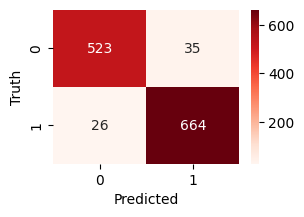

In [ ]:
y_pred = svm1.predict(test_xr)
c11 = confusion_matrix(test_yr, y_pred)
plt.figure(figsize=(3,2))
sn.heatmap(c11, annot=True,cmap='Reds', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')